# Часть 1

## № 1
Для тестирования новой программы компьютер выбирает случайное действительное число A из отрезка [1,2] и заставляет программу решать уравнение $3x+A=0$.  Найдите вероятность того, что корень этого уравнения меньше чем -0,4.

### Решение:
Сначала выразим корень уравнения $x$ через параметр $A$:
$$3x + A = 0 => 3x = -A => x = -\frac{A}{3}$$
Теперь подставим это выражение в условие $x < -0.4$:
$$-\frac{A}{3} < -0.4$$
Решим неравенство относительно $A$. Умножим обе части на $-3$ (при этом знак неравенства меняется на противоположный):
$$A > 0.4 \cdot 3$$
$$A > 1.2$$

С помощью формулы равномерного распределения, найдем вероятность:
$$P=\frac{2-1.2}{2-1}=\frac{0.8}{1}=0.8$$
Ответ: 0.8


## № 2
Пишется наудачу некоторое двузначное число. Какова вероятность того, что сумма цифр этого числа равна 5?

### Решение:
Двузначные числа начинаются с **10** и заканчиваются **99**. Всего их существует **90**.

Нужно найти все двузначные числа, сумма цифр которых равна **5**. Обозначим число как $xy$, где $x$ — первая цифра, а $y$ — вторая.

Условие: $x + y = 5$.

| Число | Десятки (x) | Единицы (y) | Сумма (x+y) |
| ----- | ----------- | ----------- | ----------- |
| 14    | 1           | 4           | 5           |
| 23    | 2           | 3           | 5           |
| 32    | 3           | 2           | 5           |
| 41    | 4           | 1           | 5           |
| 50    | 5           | 0           | 5           |

Итого, количество благоприятных исходов 5.
Подставляем значения в формулу для определения вероятности:

$$P = \frac{5}{90}=0,0556$$

Ответ: 0,0556

## №3
Даны независимые в совокупности события A, B, C. Известно, что P(A)=P(B)=P(C)=1/2. Найдите $P(\bar{A} \cup \bar{B} \cup \bar{C})$

### Решение:
Согласно законам, объединение отрицаний, их пересечения:

$\bar{A} \cup \bar{B} \cup \bar{C} = \bar{A \cap B \cap C}$, вероятность события можно выразить так: $P(\bar{A} \cup \bar{B} \cup \bar{C}) = 1 - P(A \cap B \cap C)$

По независимости событий получаем:

$P(A \cap B \cap C)=P(A)\cdot P(B) \cdot P(C)=\frac{1}{2} \cdot \frac{1}{2} \cdot \frac{1}{2}=\frac{1}{8}$

Вероятность искомого объединения:

$1 - \frac{1}{8}=\frac{7}{8}$

Ответ: $\frac{7}{8}$

## №4
Петя и Вася играют шахматный матч из 8 партий. Вероятность ничьей в каждой партии равна 3/4, а вероятность победы каждого из игроков равна 1/8, причем результаты партий независимы между собой. Найдите вероятность того, что первым партию выиграет Петя.

### Решение:
Так как вероятности победы Пети и Васи в каждой партии равны ($1/8 = 1/8$), то в любой результативной партии их шансы на успех **равны**. Следовательно, если кто-то из них выиграл партию, то с вероятностью **1/2** это был Петя и с вероятностью **1/2** — Вася.

# Часть 2

Инициализация списка

In [ ]:
from typing import List
data = [1, 5, 2, 7, 1, 6, 3, 8, 5, 8, 1, 2]

## Мода

In [ ]:
def moda(data: List[int]) -> int|float:
  dd = {}
  for val in data:
    dd[val] = dd.get(val, 0) + 1

  c = 0
  val = None
  for i in dd.keys():
    if dd[i] > c:
      c = dd[i]
      val = i

  return val
  # return max(dd, key=dd.get)

## Медиана

In [ ]:
def median(data: List[int]) -> int|float:
    data = sorted(data)

    if len(data) % 2 == 1:
        return data[len(data) // 2]
    else:
        m = len(data) // 2
        return sum(data[m-1:m+1]) / 2

## Среднее значение

In [ ]:
def mean(data: List[int]) -> float:
    return sum(data) / len(data)

## Размах

In [ ]:
def scope(data: List[int]) -> int|float:
    return max(data) - min(data)

## Дисперсия

In [ ]:
def variance(data: List[int]) -> List[float]:
    avg = sum(data) / len(data)
    s_var = sum((val - avg)**2 for val in data)

    return [s_var / len(data), s_var / (len(data) - 1)] if len(data) > 1 else [s_var / len(data)]

## Стандартное отклонение

In [ ]:
def standard_deviation(data: List[int]) -> List[float]:
    return [v ** 0.5 for v in variance(data)]

## Проверка

In [ ]:
print(moda(data))
print(median(data))
print(mean(data))
print(scope(data))
print(variance(data))
print(standard_deviation(data))

1
4.0
4.083333333333333
7
[6.909722222222222, 7.537878787878788]
[2.628635049264584, 2.7455197664338145]


## Реализация ввиде класса

In [ ]:
from typing import List, Optional

class Analytics:
    def __init__(self, data: List[int | float]):
        self._data: List[int | float] = list(data)
        self._len_data: int = len(data)
        self._sorted: Optional[List[int | float]] = None

    @property
    def data(self) -> List[int | float]:
        return self._data

    @property
    def sort_data(self) -> List[int | float]:
        if self._sorted is None:
            self._sorted = sorted(self._data)
        return self._sorted

    def __update(self) -> None:
        self._len_data = len(self._data)
        self._sorted = sorted(self._data)

    def add(self, value: int | float) -> None:
        self._data.append(value)
        self.__update()

    def remove(self, value: int | float) -> None:
        if value in self._data:
            self._data.remove(value)
            self.__update()
        else:
            print(f"Значение {value} не найдено")

    def moda(self) -> Optional[int | float]:
        if not self._data:
            return None
        dd = {}
        for val in self._data:
            dd[val] = dd.get(val, 0) + 1

        c = 0
        val = None
        for i in dd.keys():
            if dd[i] > c:
                c = dd[i]
                val = i
        return val

    def median(self) -> Optional[int | float]:
        if self._len_data == 0:
            return None
        if self._len_data % 2 == 1:
            return self.sort_data[self._len_data // 2]
        else:
            mid = self._len_data // 2
            return sum(self.sort_data[mid - 1:mid + 1]) / 2

    def mean(self) -> float:
        if self._len_data == 0:
            return 0.0
        return sum(self._data) / self._len_data

    def scope(self) -> int | float:
        if not self._data:
            return 0
        return max(self._data) - min(self._data)

    def variance(self) -> List[float]:
        if self._len_data == 0:
            return [0.0]
        avg = self.mean()
        s_var = sum((val - avg) ** 2 for val in self._data)

        return [s_var / self._len_data, s_var / (self._len_data - 1)] \
            if self._len_data > 1 else [s_var / self._len_data]

    def standard_deviation(self) -> List[float]:
        return [v ** 0.5 for v in self.variance()]

## Проверка

In [ ]:
a = Analytics(data)
print(a.moda())
print(a.median())
print(a.mean())
print(a.scope())
print(a.variance())
print(a.standard_deviation())

1
4.0
4.083333333333333
7
[6.909722222222222, 7.537878787878788]
[2.628635049264584, 2.7455197664338145]


# Задание 2

In [ ]:
!pip install numpy
!pip install pandas
!pip install scipy

import numpy as np
import pandas as pd
from scipy import stats
import statistics

## Стандартная библиотека statistics

In [ ]:
print(f"Среднее: {statistics.mean(data)}")
print(f"Медиана: {statistics.median(data)}")
print(f"Мода:    {statistics.mode(data)}") # Вернет первую встреченную моду
print(f"Дисперсия (sample): {statistics.variance(data)}") # n-1
print(f"Ст. отклонение:     {statistics.stdev(data)}")

Среднее: 4.083333333333333
Медиана: 4.0
Мода:    1
Дисперсия (sample): 7.537878787878788
Ст. отклонение:     2.7455197664338145


## NumPy

In [ ]:
print(f"Среднее: {np.mean(data)}")
print(f"Медиана: {np.median(data)}")
# В NumPy нет прямой функции моды, обычно используют stats.mode из SciPy
print(f"Размах:  {np.ptp(data)}") # ptp = "peak to peak"
print(f"Дисперсия (pop):    {np.var(data)}") # По умолчанию n
print(f"Ст. отклонение:     {np.std(data)}")

Среднее: 4.083333333333333
Медиана: 4.0
Размах:  7
Дисперсия (pop):    6.909722222222221
Ст. отклонение:     2.628635049264584


## Pandas

In [ ]:
df = pd.Series(data)
print(f"Среднее: {df.mean()}")
print(f"Медиана: {df.median()}")
print(f"Мода:    {df.mode().tolist()[0]}") # Возвращает Series, так как мод может быть много
print(f"Размах:  {df.max() - df.min()}")
print(f"Дисперсия (sample): {df.var()}") # По умолчанию n-1
print(f"Ст. отклонение:     {df.std()}")

Среднее: 4.083333333333333
Медиана: 4.0
Мода:    1
Размах:  7
Дисперсия (sample): 7.537878787878787
Ст. отклонение:     2.7455197664338145


## SciPy

In [ ]:
print(f"Среднее: {np.mean(data)}") # SciPy использует NumPy для базовых мер
# Мода в SciPy возвращает объект с частотой
mode_res = stats.mode(data, keepdims=True)
print(f"Мода:    {mode_res.mode[0]} (встречается {mode_res.count[0]} раз)")
print(f"Дисперсия (sample): {stats.tvar(data)}") # tvar = trimmed variance (по умолчанию n-1)
print(f"Ст. отклонение:     {stats.tstd(data)}")

Среднее: 4.083333333333333
Мода:    1 (встречается 3 раз)
Дисперсия (sample): 7.537878787878786
Ст. отклонение:     2.7455197664338145


# Звдвние 3
Датасет – lava18/google-play-store-apps


Загрузка датасета

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "googleplaystore.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "lava18/google-play-store-apps",
  file_path,
)
print("First 5 records:", df.head())

/tmp/ipython-input-417844225.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'google-play-store-apps' dataset.
First 5 records:                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \


Построение 5 гистограмм

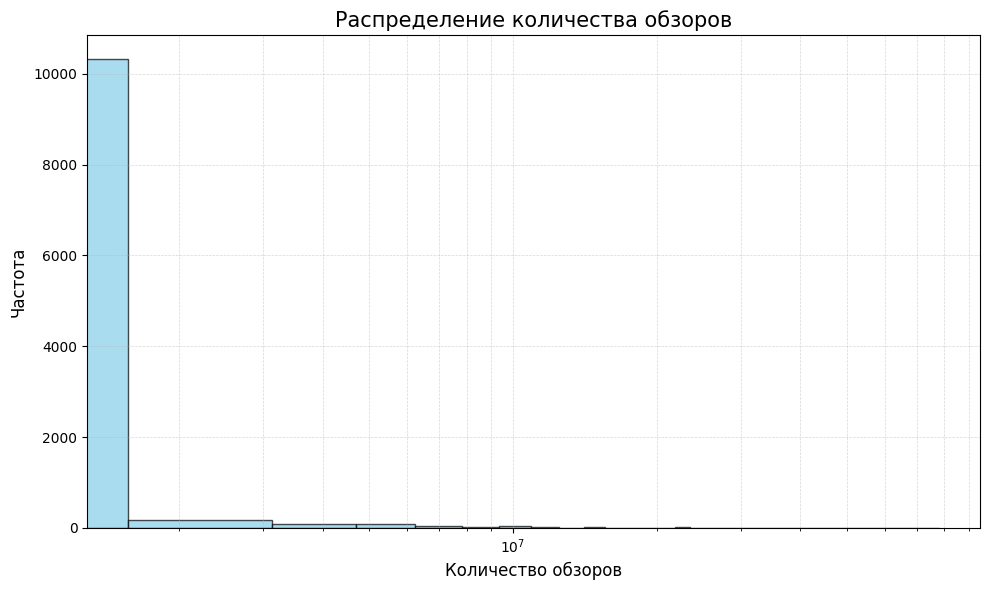

In [ ]:
import matplotlib.pyplot as plt

df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df = df.dropna(subset=['Reviews'])

plt.figure(figsize=(10, 6))
plt.hist(df['Reviews'], bins=50, color="skyblue", edgecolor="black", alpha=0.7)

plt.xscale('log')

plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)

plt.title("Распределение количества обзоров", fontsize=15)
plt.xlabel("Количество обзоров", fontsize=12)
plt.ylabel("Частота", fontsize=12)

plt.tight_layout()
plt.show()

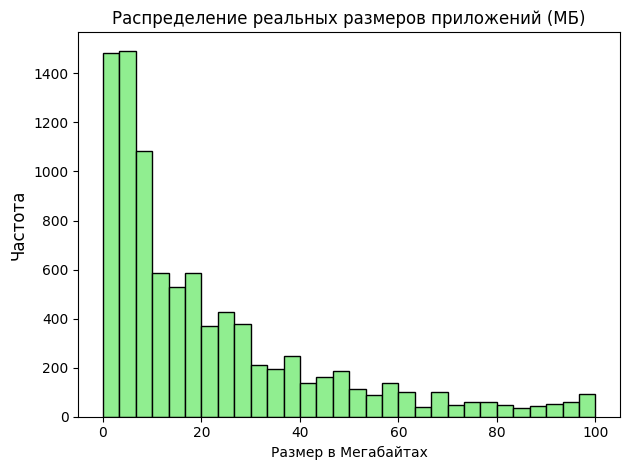

In [ ]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', ''))
    if 'k' in size:
        return float(size.replace('k', '')) / 1024
    return np.nan # Для "Varies with device"

df['Size_numeric'] = df['Size'].apply(convert_size)
df_clean = df.dropna(subset=['Size_numeric'])

plt.hist(df_clean['Size_numeric'], bins=30, color="lightgreen", edgecolor="black")
plt.title("Распределение реальных размеров приложений (МБ)")
plt.xlabel("Размер в Мегабайтах")
plt.ylabel("Частота", fontsize=12)

plt.tight_layout()
plt.show()

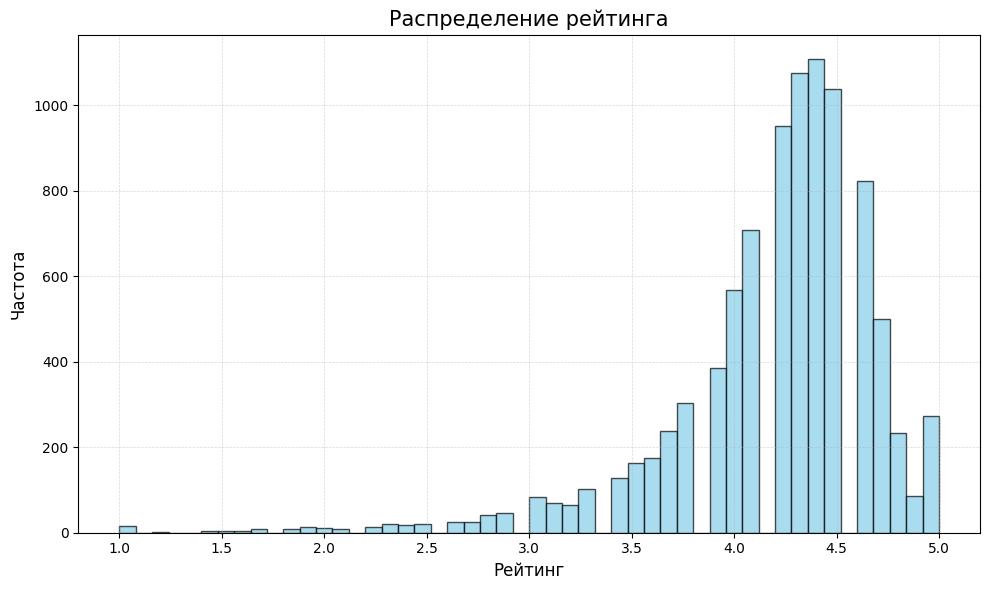

In [ ]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df = df.dropna(subset=['Rating'])

plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=50, color="skyblue", edgecolor="black", alpha=0.7)

plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)

plt.title("Распределение рейтинга", fontsize=15)
plt.xlabel("Рейтинг", fontsize=12)
plt.ylabel("Частота", fontsize=12)

plt.tight_layout()
plt.show()

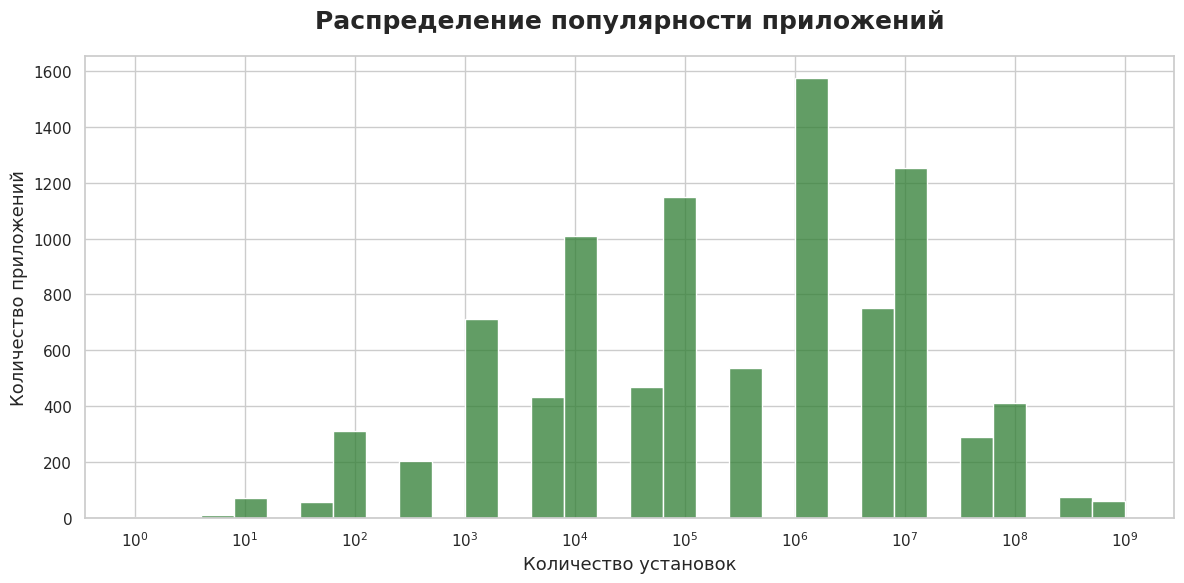

In [ ]:
import seaborn as sns
df['Installs'] = df['Installs'].astype(str)

# удаляем '+' и ','
df['Installs_numeric'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs_numeric'] = df['Installs_numeric'].str.replace(',', '', regex=False)

# конвертируем в числа
df['Installs_numeric'] = pd.to_numeric(df['Installs_numeric'], errors='coerce')
df = df.dropna(subset=['Installs_numeric'])

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(df['Installs_numeric'],
             bins=30,
             color="#2e7d32",
             edgecolor="white",
             log_scale=True)

plt.title("Распределение популярности приложений", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Количество установок", fontsize=13)
plt.ylabel("Количество приложений", fontsize=13)

plt.xticks([1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000])

plt.tight_layout()
plt.show()

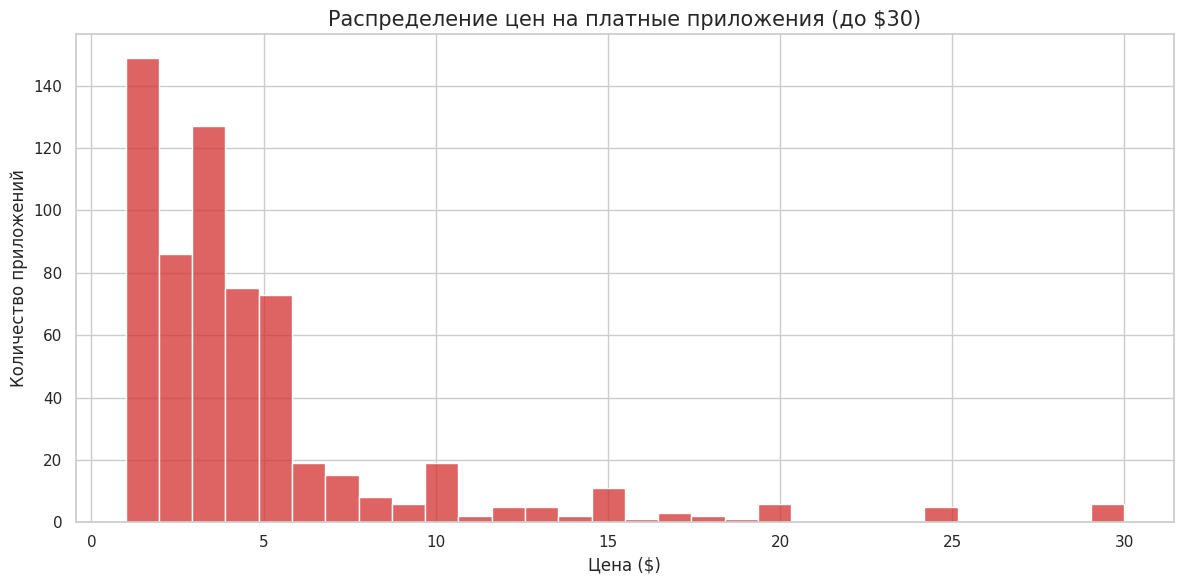

In [ ]:
df['Price_numeric'] = df['Price'].astype(str).str.replace('$', '', regex=False).astype(float)

paid_apps = df[(df['Price_numeric'] > 0) & (df['Price_numeric'] < 30)]

plt.figure(figsize=(12, 6))
sns.histplot(paid_apps['Price_numeric'], bins=30, color="#d32f2f") # Красный цвет

plt.title("Распределение цен на платные приложения (до $30)", fontsize=15)
plt.xlabel("Цена ($)", fontsize=12)
plt.ylabel("Количество приложений", fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
features = {
    "Рейтинг": df['Rating'].dropna(),
    "Обзоры": df['Reviews'].dropna(),
    "Размер (МБ)": df['Size_numeric'].dropna(),
    "Установки": df['Installs_numeric'].dropna(),
    "Цена ($)": df['Price_numeric'].dropna()
}

for name, values in features.items():
    stats = Analytics(values.tolist())
    print(f"Признак: {name}")
    print(f"Среднее: {stats.mean()}")
    print(f"Медиана: {stats.median()}")
    print(f"Мода: {stats.moda()}")
    print(f"Размах: {stats.scope()}")
    print(f"Дисперсия: {stats.variance()[0]}")
    print(f"Ст. отклонение: {stats.standard_deviation()[0]}")
    print("\n")

Признак: Рейтинг
Среднее: 4.191757420456972
Медиана: 4.3
Мода: 4.4
Размах: 4.0
Дисперсия: 0.2654221303501258
Ст. отклонение: 0.5151913531399045


Признак: Обзоры
Среднее: 514049.8365364083
Медиана: 5930.5
Мода: 2.0
Размах: 78158305.0
Дисперсия: 9883945483115.273
Ст. отклонение: 3143874.2791522807


Признак: Размер (МБ)
Среднее: 22.95727074724657
Медиана: 14.0
Мода: 14.0
Размах: 99.99169921875
Дисперсия: 549.6349456122767
Ст. отклонение: 23.44429452153075


Признак: Установки
Среднее: 17897443.726030324
Медиана: 500000.0
Мода: 1000000
Размах: 999999999
Дисперсия: 8323523519611746.0
Ст. отклонение: 91233346.53300703


Признак: Цена ($)
Среднее: 0.9609278240444159
Медиана: 0.0
Мода: 0.0
Размах: 400.0
Дисперсия: 250.1376361560121
Ст. отклонение: 15.815740139367872


